<a href="https://colab.research.google.com/github/dtoralg/INESDI_Data-Science_ML_IA/blob/main/%5B01%5D%20-%20Preparaci%C3%B3n%20de%20datos%20y%20EDA/Ingenieria_Ejercicio_7_nuevas_variables_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingeniería de Variables - Ejercicio 7: nuevas_variables_titanic.ipynb

En este ejercicio aprenderás a crear nuevas variables (features) a partir de las ya existentes en el dataset de Titanic.

El objetivo es enriquecer el dataset con información derivada que pueda ser útil para un modelo predictivo.

### Objetivos
- Crear nuevas variables numéricas y categóricas.
- Comprender el valor de la ingeniería de variables para mejorar modelos.
- Aplicar transformaciones lógicas, combinaciones y agrupaciones.

### Descripción del dataset
Dataset Titanic. Contiene información de pasajeros (edad, clase, sexo, tarifa, cabina, puerto de embarque, etc.).

Fuente: [Datasciencedojo Titanic](https://github.com/datasciencedojo/datasets/blob/master/titanic.csv)

In [1]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar dataset Titanic
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Creación de variables derivadas simples

In [14]:
# Ejemplo: crear variable binaria is_child (1 si Age < 12, 0 en caso contrario)
df['is_child'] = (df['Age'] < 12).astype(int)
df[['Age','is_child']].sort_values(by = ['Age']).head()

,Age,is_child
803,0.42,1
755,0.67,1
644,0.75,1
469,0.75,1
78,0.83,1


In [4]:
# Ejemplo: crear variable log_fare como logaritmo de la tarifa (para reducir sesgo de outliers)
import numpy as np
df['log_fare'] = np.log1p(df['Fare'])
df[['Fare','log_fare']].head()

,Fare,log_fare
0,7.2500,2.110213
1,71.2833,4.280593
2,7.9250,2.188856
3,53.1000,3.990834
4,8.0500,2.202765


### 2. Creación de variables combinadas

In [5]:
# Familia a bordo: combinación de SibSp (siblings/spouses) y Parch (parents/children)
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df[['SibSp','Parch','family_size']].head()

,SibSp,Parch,family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [6]:
# Clase económica: combinar Pclass y Fare en una variable categórica
df['economic_class'] = pd.cut(df['Fare'], bins=[0,10,50,100,600], labels=['low','mid','high','vip'])
df[['Fare','economic_class']].head()

,Fare,economic_class
0,7.2500,low
1,71.2833,high
2,7.9250,low
3,53.1000,high
4,8.0500,low


### 3. Extracción de información de texto

In [7]:
# Extraer la inicial del título del pasajero a partir de Name (Mr, Mrs, Miss, etc.)
df['title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df[['Name','title']].head()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2447065729.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,Name,title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


### 4. Visualización rápida de nuevas variables

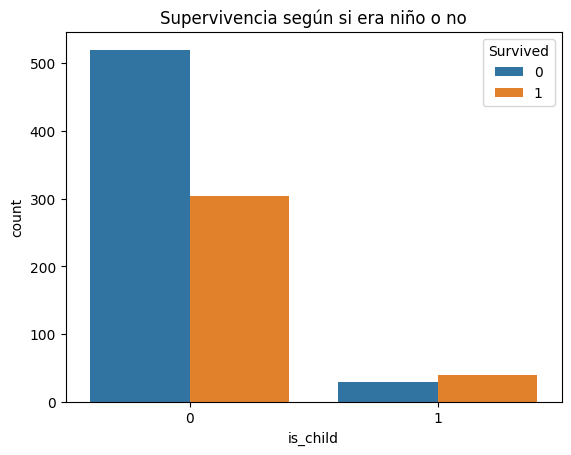

In [8]:
sns.countplot(x='is_child', hue='Survived', data=df)
plt.title('Supervivencia según si era niño o no')
plt.show()

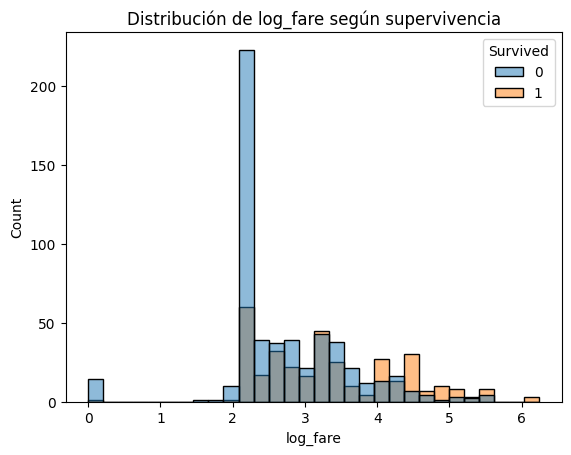

In [9]:
sns.histplot(data=df, x='log_fare', hue='Survived', bins=30)
plt.title('Distribución de log_fare según supervivencia')
plt.show()

### Conclusión
Hemos aprendido a generar nuevas variables de diferentes tipos:
- Binarias (is_child)
- Transformadas (log_fare)
- Combinadas (family_size)
- Agrupadas/categorizadas (economic_class)
- Extraídas de texto (title)

La creación de nuevas variables es clave para mejorar la capacidad predictiva de los modelos.